# Uncertainty calculation using Monte Carlo Method

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Configuration of plotting

In [2]:
plt.rcParams["font.size"] = 12
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False

In [29]:
def histogram_confidence_interval(title_grafic, data, xlabel,  ylabel, confidence_interval, N, bins, color):
    alpha = 1 - confidence_interval
    n = int(round(1/2*alpha*N, 0)) # 2.5% of N
    data_mean = np.mean(data)
    data_std = np.std(data)
    data_sort = np.sort(data)
    data_lower_limit, data_upper_limit = data_sort[n], data_sort[N-n]
    plt.hist(data, bins = bins, color = color)
    plt.title(f"{title_grafic}:\n{str(confidence_interval * 100)}% Confidence Interval\n using MonteCarlo\n")
    plt.axvline(data_lower_limit, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_upper_limit, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_mean, color = "green", linestyle = "--", linewidth = 3)
    plt.xlabel(xlabel)
    plt.xlabel(ylabel)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.text(x = 0, y = 0.5,  s = f"Lower limit:\n{round(data_lower_limit, 4)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.5, y = 0.5, s = f"Mean:\n{round(data_mean, 4)} u", ha = 'center', va = 'center', fontfamily = 'monospace', backgroundcolor = color, transform=plt.gca().transAxes)
    plt.text(x = 1, y = 0.5, s = f"Upper limit:\n{round(data_upper_limit, 4)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.20, y = 0.25, s = f"$-U$ = {round(data_mean - data_lower_limit, 4)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.80, y = 0.25, s = f"$+U$ = {round(data_upper_limit - data_mean, 4)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.5, y = 0.1, s = f"$U(range)$ = {round(data_upper_limit - data_lower_limit, 5)} u", ha = 'center', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.show()
    del data_mean, data_std, data_sort, data_lower_limit, data_upper_limit

#### Values for the simulation

In [4]:
N = 1_000_000 # Num of simulations
bins = 400 # For histrogram plot
np.random.seed(10) # For reproducibility of random values

#### Exploring of individual distributions 

##### Uncertainty of $x_1$

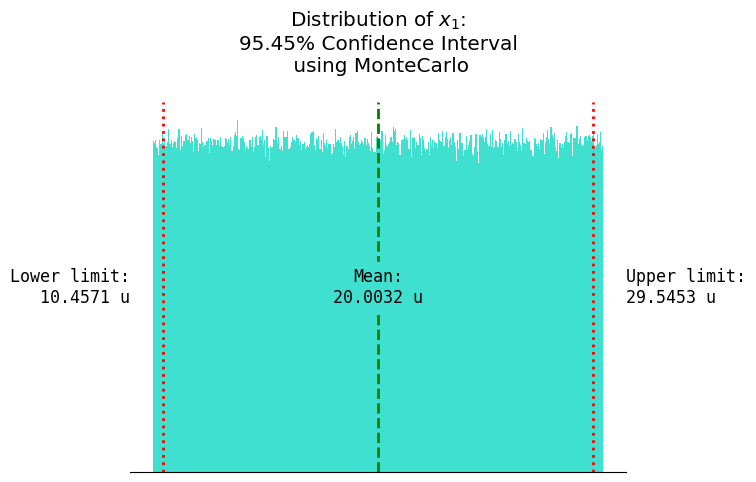

In [176]:
# Using a uniform distribution
a, b = 10.0, 30.0
x1 = np.random.uniform(a, b, N)
histogram_confidence_interval("x_1", x1, 0.9545, N, bins, 'turquoise')

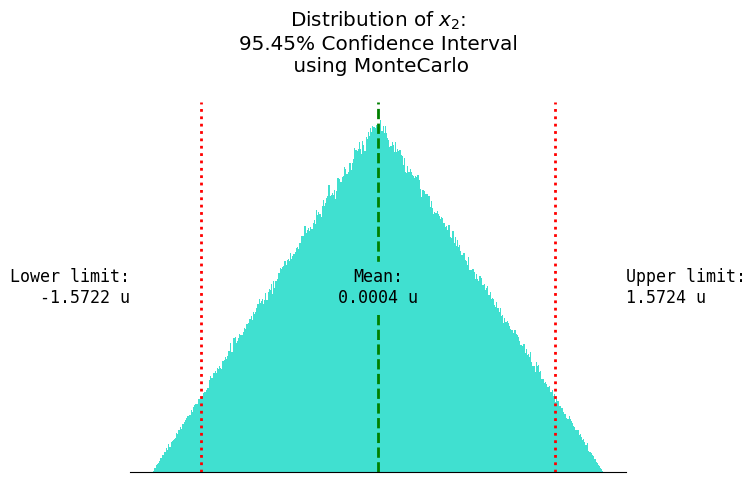

In [177]:
# Using a triangule distribution
a, m, b = -2, 0, 2
x2 = np.random.triangular(a, m, b, N)
histogram_confidence_interval("x_2", x2, 0.9545, N, bins, 'turquoise')

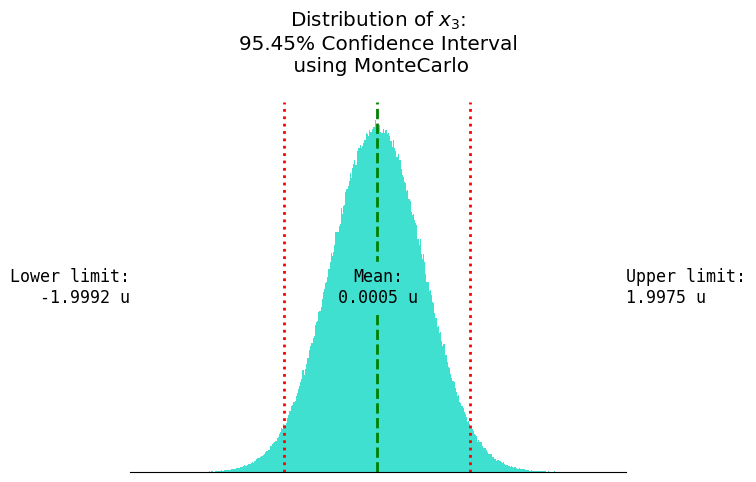

In [178]:
# Using a normal distribution
m, s = 0, 1
x3 = np.random.normal(m, s, N)
histogram_confidence_interval("x_3", x3, 0.9545, N, bins, 'turquoise')

### Uncertainty type A

For 10 measurements between -1 and 1

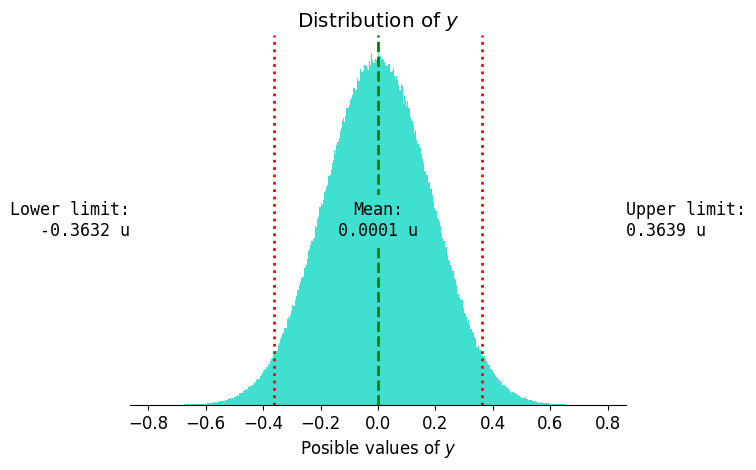

In [111]:
lectures = 10
a, b = -1, 1
x_sim = sum([np.random.uniform(a, b, N) for _ in range(lectures)])
y = x_sim/lectures
histogram_confidence_interval("y", y, 0.9545, N, bins, 'turquoise')

### Uncertainty propagation using a basic model

#### Model

$$ y = 5x_1 - 3x_2 + x_3$$

suposse that $x_1$, $x_2$, $x_3$ are independent variables

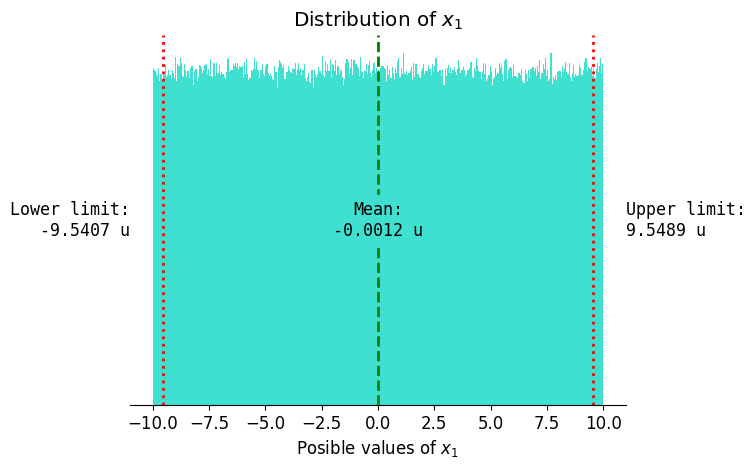

In [112]:
# Uniform distribution
a, b = 10, -10
x1 = np.random.uniform(a, b, N)
plt.hist(x1, bins = bins)
histogram_confidence_interval("x_1", x1, 0.9545, N, bins, 'turquoise')

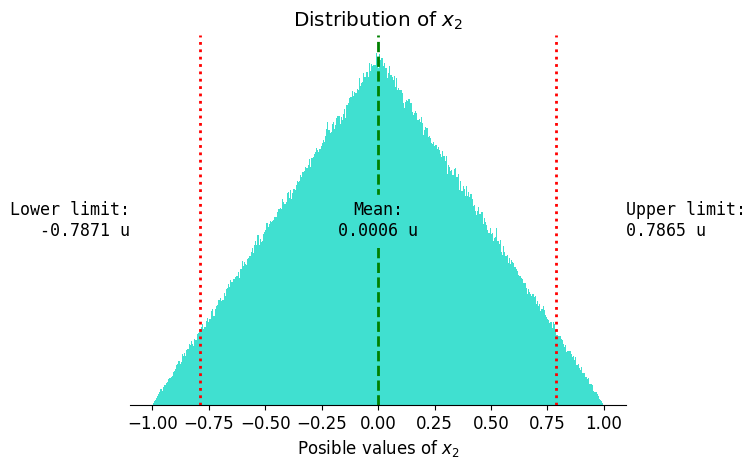

In [113]:
# Triangular distribution
a, m, b = -1, 0, 1
x2 = np.random.triangular(a, m, b, N)
histogram_confidence_interval("x_2", x2, 0.9545, N, bins, 'turquoise')

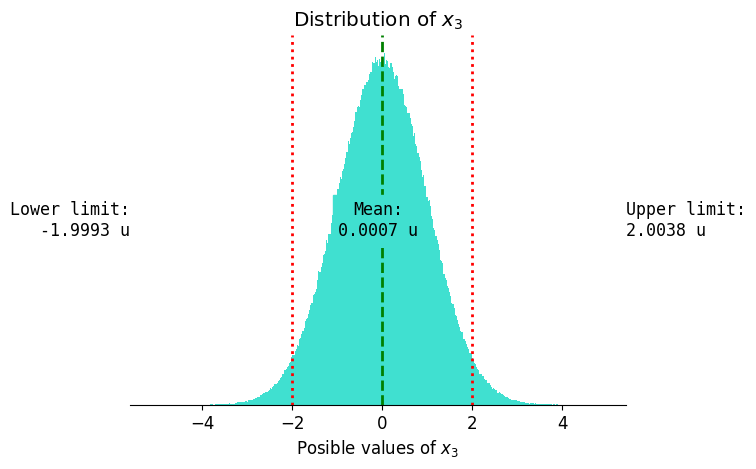

In [114]:
# Normal distribution
m, s = 0, 1
x3 = np.random.normal(m, s, N)
histogram_confidence_interval("x_3", x3, 0.9545, N, bins, 'turquoise')

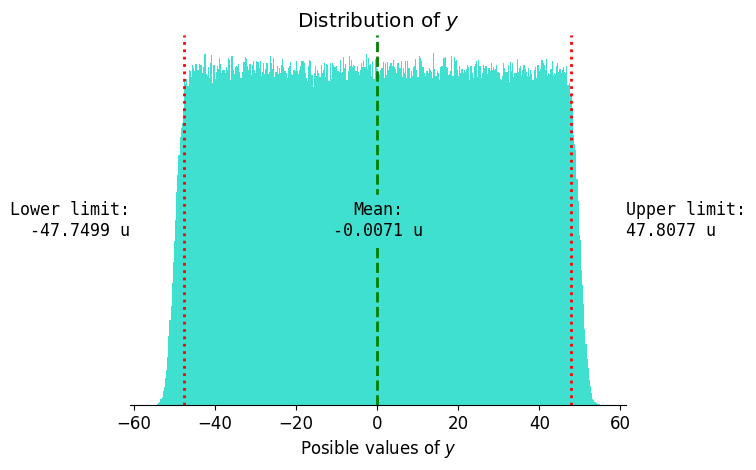

In [115]:
# Distribution of y
y = 5*x1 - 3*x2 + x3
histogram_confidence_interval("y", y, 0.9545, N, bins, 'turquoise')

### Example


Model

$$E = (V_x + \delta V_{resolution}) - (V_{cal} + \delta V_{instrumental})$$

In [13]:
lectures = [40.000, 39.999, 39.998, 40.000, 39.999, 39.999] # Lectures of a electronic instrument (DMM)
n = len(lectures)
N = 1_000_000 # Number of simulations

Uncertainty type A

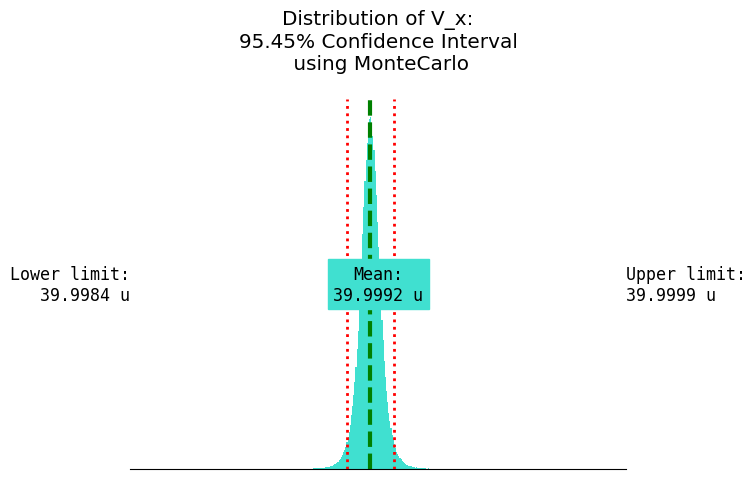

In [30]:
# t-Student distribution
df = n - 1 # Degrees of freedom
mean = np.mean(lectures)
std = np.std(lectures)/np.sqrt(n)
Vx = mean + std * np.random.standard_t(df = df, size = N)
histogram_confidence_interval("Distribution of V_x", Vx,"", "", 0.9545, N, bins, 'turquoise')


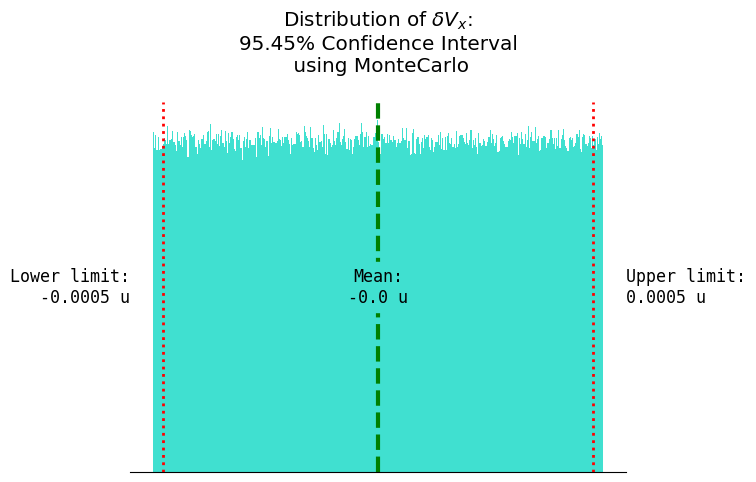

In [31]:
# Uniform distribution
resolution = 0.001
a, b = -resolution/2, resolution/2
dVx = np.random.uniform(a, b, N)
histogram_confidence_interval("Distribution of $\delta V_x$", dVx,"", "", 0.9545, N, bins, 'turquoise')

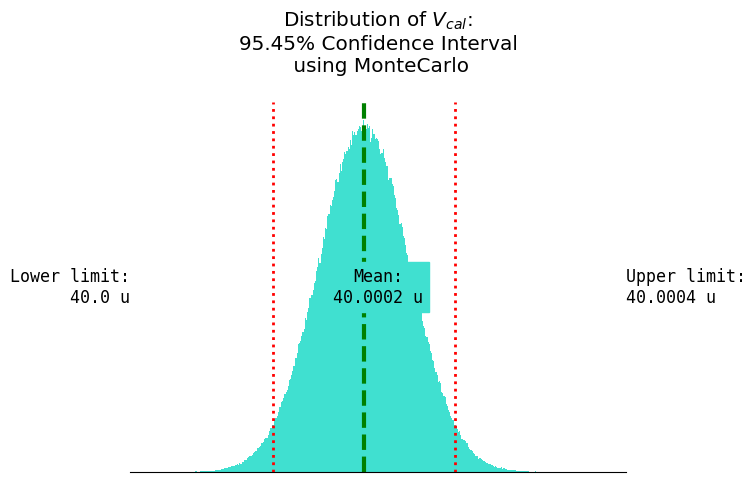

In [32]:
# Normal distribution
m = 40.0002
U_cal = 0.0002
U_factor = 2
s_cal = U_cal/U_factor
V_cal = np.random.normal(m, s_cal, N)
histogram_confidence_interval("Distribution of $V_{cal}$", V_cal, "", "", 0.9545, N, bins, 'turquoise')

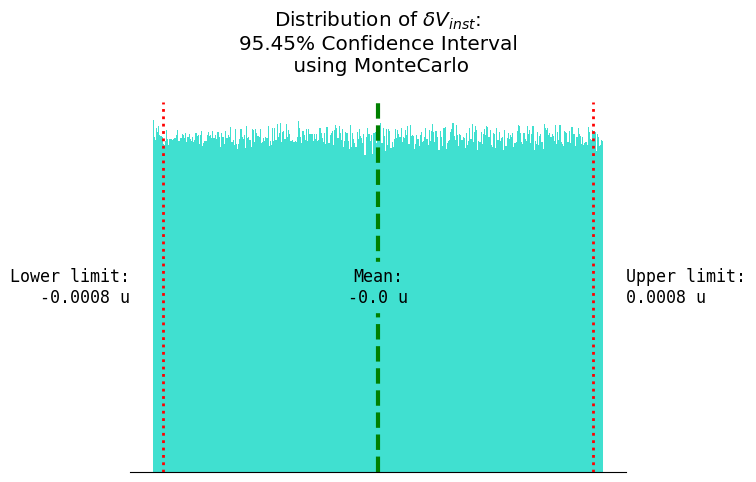

In [33]:
# Uniform distribution
a, b = 0.00087, -0.00087
dV_inst = np.random.uniform(a, b, N)
histogram_confidence_interval("Distribution of $\delta V_{inst}$", dV_inst, "", "", 0.9545, N, bins, 'turquoise')

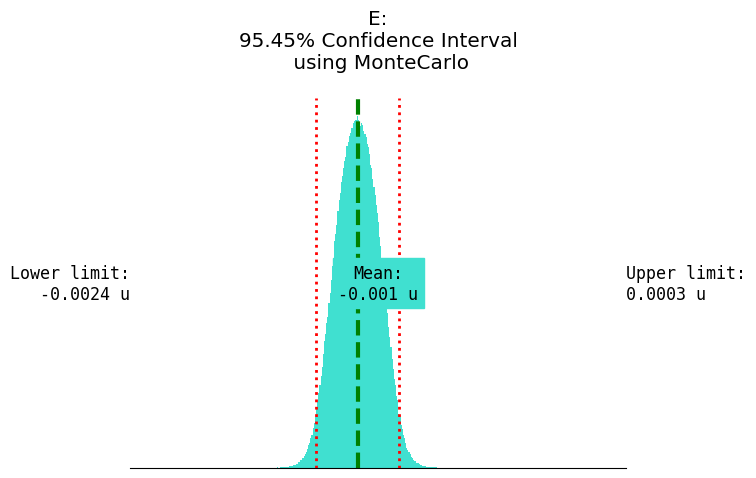

In [35]:
# Uncertainty of E
E = (Vx + dVx) - (V_cal + dV_inst)
histogram_confidence_interval("E", E, "", "", 0.9545, N, bins, 'turquoise')

## Boostraping

In [56]:
def boostrap_confidence_interval(data, sample_size, number_samples, confidence, color):
    samples = np.random.choice(data, size=(sample_size, number_samples), replace=True)
    confidence_interval = np.quantile(samples.mean(axis=1), [1.0 - confidence, confidence])
    lower_limit, upper_limit = confidence_interval[0], confidence_interval[1]
    mean = np.mean(samples.mean(axis=1))
    plt.hist(samples.mean(axis = 1), bins = 100, color = color)
    plt.axvline(lower_limit, label = f"Lower limit: {np.round(lower_limit, 4)} u", color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(upper_limit, label = f"Upper limit: {np.round(upper_limit, 4)} u", color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(mean, label = f"Mean: {np.round(mean, 4)}", color = "green", linestyle = "--", linewidth = 2)
    plt.title(f"Measurement Uncertainty: {str((confidence) * 100)}% Confidence Interval\n using MonteCarlo and Bootstrap\n\n", fontfamily = 'monospace')
    plt.xlabel('\nPossible values of data')
    plt.tick_params(axis='y', labelleft=False)
    plt.text(x = 0, y = 0.5,  s = f"Lower limit:\n{round(lower_limit, 4)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.5, y = 0.5, s = f"Mean:\n{round(mean, 4)} u", ha = 'center', va = 'center', backgroundcolor = color, fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 1, y = 0.5, s = f"Upper limit:\n{round(upper_limit, 4)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.20, y = 0.25, s = f"$-U$ = {round(mean - lower_limit, 5)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.80, y = 0.25, s = f"$+U$ = {round(upper_limit - mean, 5)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.5, y = 0.1, s = f"$U(range)$ = {round(upper_limit - lower_limit, 5)} u", ha = 'center', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()
    del samples, confidence_interval, lower_limit, upper_limit, mean

We can use boostrapping to find the confidence intervals if, in the last step, our data isn't normal 

In [37]:
sample_size = 100_000
number_samples = 100
samples = np.random.choice(E, size=(sample_size, number_samples), replace=True) # Select random samples from the E data
samples.shape
color = 'turquoise'

Confidence interval using quantiles

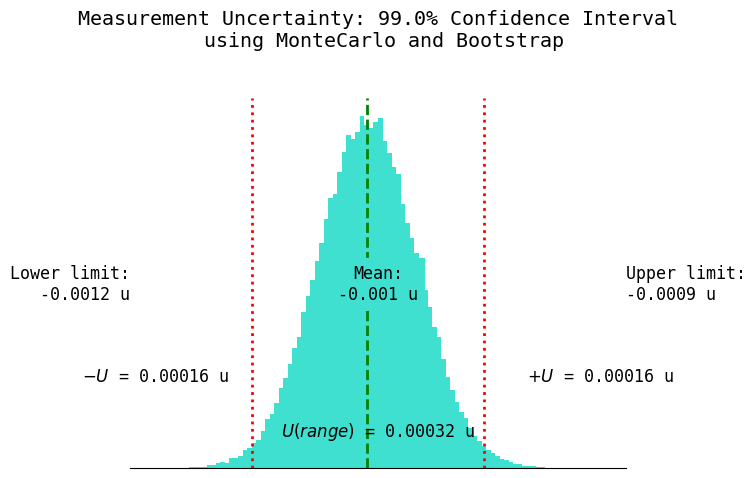

In [38]:
boostrap_confidence_interval(E, 100_000, 100, 0.99, color = 'turquoise')

### Example 2: concentration in calibration curve

Model 

$$concentration = \frac{y_{sample} - intercept}{slope} \cdot \frac{V_{final}}{V_{aliquot}} $$ 

In [39]:
N = 1_000_000 # Num of simulations
bins = 400 # For histrogram plot
np.random.seed(10) # For reproducibility of random values

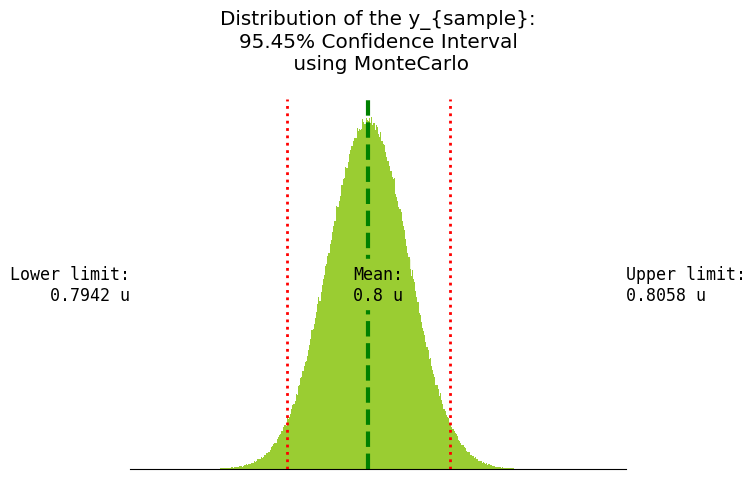

In [45]:
# Distribution of y_sample
mean = 0.800 # abs
std = 0.005/np.sqrt(3)  # standard deviation of the mean 
y_sample = np.random.normal(mean, std, N)
histogram_confidence_interval("Distribution of the y_{sample}", y_sample, "", "", 0.9545, N, bins, color = 'yellowgreen')

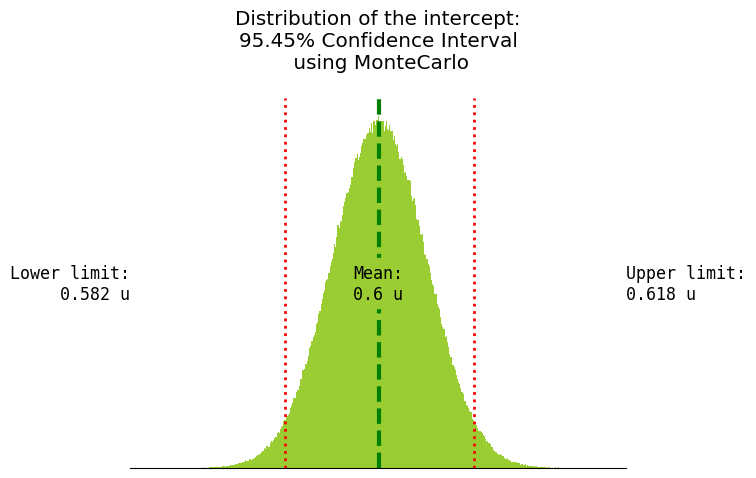

In [46]:
# Distribution of intercept
mean = 0.600 # abs
std = 0.009  # standard deviation of the mean 
intercept = np.random.normal(mean, std, N)
histogram_confidence_interval("Distribution of the intercept", intercept, "", "", 0.9545, N, bins, color = 'yellowgreen')

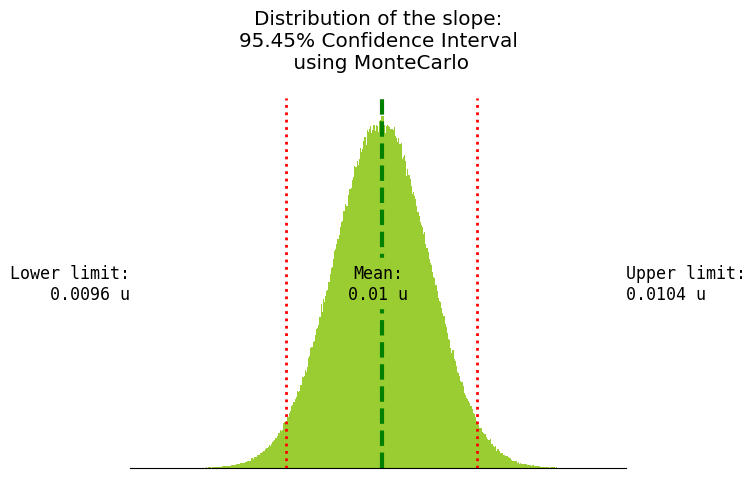

In [47]:
# Distribution of slope
mean = 0.0100 # abs
std = 0.0002  # standard deviation of the mean 
slope = np.random.normal(mean, std, N)
histogram_confidence_interval("Distribution of the slope", slope,"", "", 0.9545, N, bins, color = 'yellowgreen')

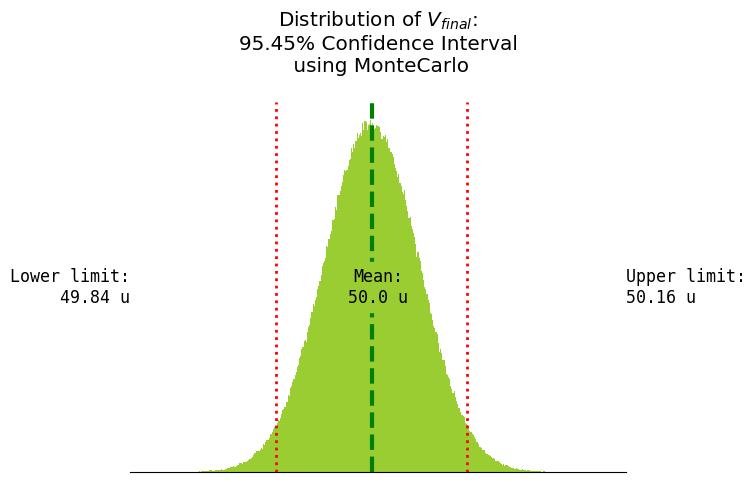

In [48]:
# Distribution of final volume
mean = 50 # abs
std = 0.08  # standard deviation of the mean 
v_final = np.random.normal(mean, std, N)
histogram_confidence_interval("Distribution of $V_{final}$", v_final, "", "", 0.9545, N, bins, color = 'yellowgreen')

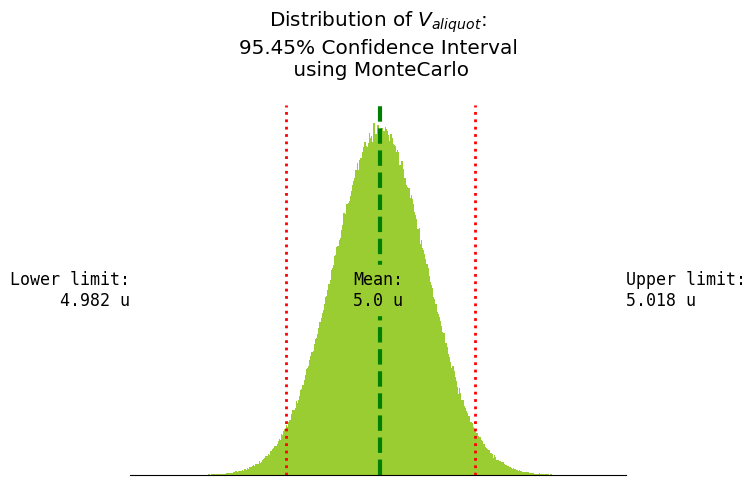

In [49]:
# Distribution of aliquot volume
mean = 5 # abs
std = 0.009  # standard deviation of the mean 
v_aliquot = np.random.normal(mean, std, N)
histogram_confidence_interval("Distribution of $V_{aliquot}$", v_aliquot, "", "", 0.9545, N, bins, color = 'yellowgreen')

using the response of the model with a histogram

In [50]:
concentration = (y_sample - intercept)/slope * (v_final/v_aliquot)

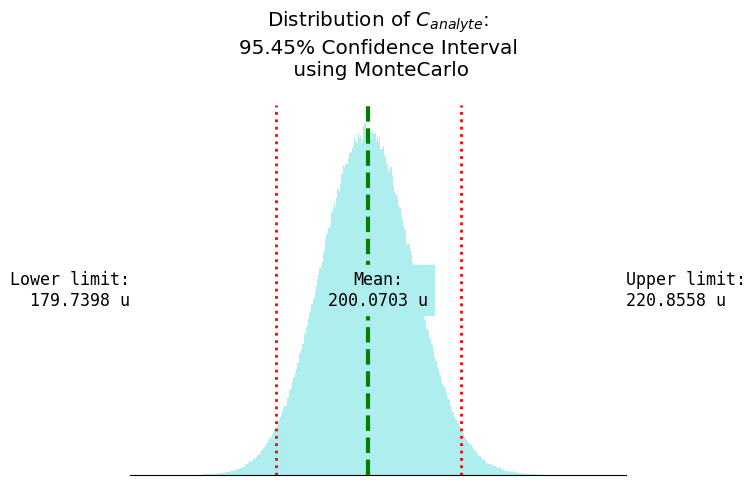

In [52]:
histogram_confidence_interval("Distribution of $C_{analyte}$", concentration, "", "", 0.9545, N, bins, color = 'paleturquoise')

using bootstrapping

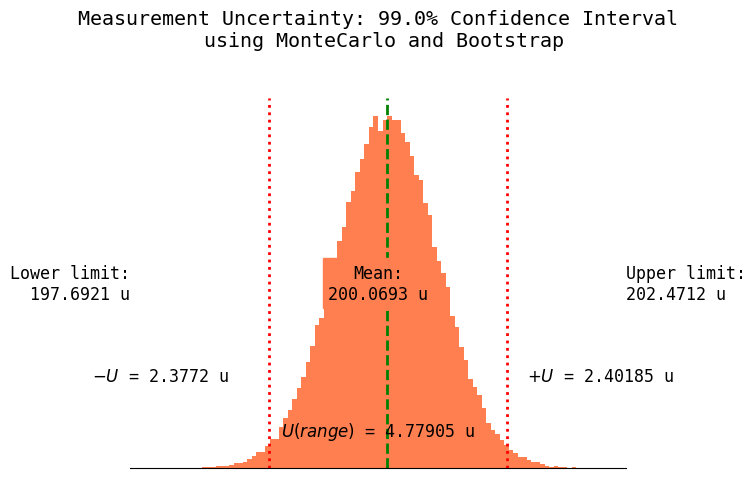

In [53]:
boostrap_confidence_interval(concentration, 100_000, 100, 0.99, 'coral')

### Modifications of functions

merge histogram function and bootstrapping funtion in only one

In [ ]:
def histogram_confidence_interval(title_grafic, data, xlabel,  ylabel, confidence_interval, N_data, bins, color):
    alpha = 1 - confidence_interval
    n = int(round(1/2*alpha*N, 0)) # 2.5% of N
    data_mean = np.mean(data)
    data_std = np.std(data)
    data_sort = np.sort(data)
    data_lower_limit, data_upper_limit = data_sort[n], data_sort[N-n]
    plt.hist(data, bins = bins, color = color)
    plt.title(f"{title_grafic}:\n{str(confidence_interval * 100)}% Confidence Interval\n using MonteCarlo\n")
    plt.axvline(data_lower_limit, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_upper_limit, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_mean, color = "green", linestyle = "--", linewidth = 3)
    plt.xlabel(xlabel)
    plt.xlabel(ylabel)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.text(x = 0, y = 0.5,  s = f"Lower limit:\n{round(data_lower_limit, 4)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.5, y = 0.5, s = f"Mean:\n{round(data_mean, 4)} u", ha = 'center', va = 'center', fontfamily = 'monospace', backgroundcolor = color, transform=plt.gca().transAxes)
    plt.text(x = 1, y = 0.5, s = f"Upper limit:\n{round(data_upper_limit, 4)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.20, y = 0.25, s = f"$-U$ = {round(data_mean - data_lower_limit, 4)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.80, y = 0.25, s = f"$+U$ = {round(data_upper_limit - data_mean, 4)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.text(x = 0.5, y = 0.1, s = f"$U(range)$ = {round(data_upper_limit - data_lower_limit, 5)} u", ha = 'center', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.show()
    del data_mean, data_std, data_sort, data_lower_limit, data_upper_limit

In [66]:
def boostrap_confidence_interval_2(title_grafic, all_data, xlabel, ylabel, confidence, sample_size, number_samples, color):
    samples = np.random.choice(all_data, size=(sample_size, number_samples), replace=True)
    plt.title(f"Measurement Uncertainty: {str((confidence) * 100)}% Confidence Interval\n using MonteCarlo and Bootstrap\n\n", fontfamily = 'monospace')
    histogram_confidence_interval(title_grafic, samples.mean(axis = 1), xlabel,  ylabel, confidence, np.size(samples, 0), bins, color)
    #plt.tick_params(axis='y', labelleft=False)
    plt.text(x = 0.20, y = 0.25, s = f"$-U$ = {round(mean - lower_limit, 5)} u", ha = 'right', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.80, y = 0.25, s = f"$+U$ = {round(upper_limit - mean, 5)} u", ha = 'left', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    plt.text(x = 0.5, y = 0.1, s = f"$U(range)$ = {round(upper_limit - lower_limit, 5)} u", ha = 'center', va = 'center', fontfamily = 'monospace', transform=plt.gca().transAxes)
    #plt.show()
    del samples

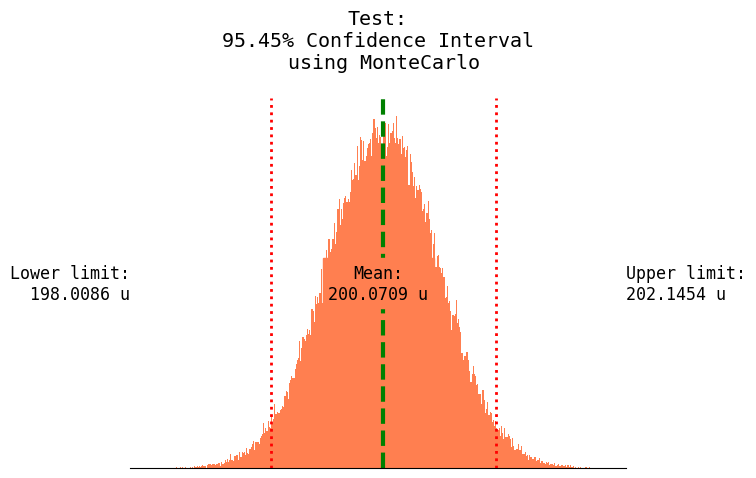

NameError: name 'lower_limit' is not defined

In [67]:
boostrap_confidence_interval_2("Test", concentration, "", "", 0.9545, 100_000, 100, 'coral')